In [47]:
from skeleton.skeleton import Skeleton
from config import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from LaFan import LaFan1

In [15]:
skeleton_mocap = Skeleton(offsets=data["offsets"], parents=data["parents"])
skeleton_mocap.remove_joints(data["joints_to_remove"])

In [85]:
filepath = './lafan1/lafan1/flipped/walk1_subject1.bvh'
start = 100
sequence_length = 1
end = start + sequence_length

sequence = LaFan1.load_single_bvh_sequence(filepath, start=start, end=end)

Sequence loaded, length 7840 frames.
Slice of length 1 returned


-1,    - joint 0, root joint not parents 
 0,    - joint 1, parent is root joint
 1, 
 2, 
 3, 
 0,    - joint is root joint
 5, 
 6, 
 7, 
 0,    - parent is root joint
 9, 
 10, 
 11, 
 12, 
 11, 
 14, 
 15, 
 16, 
 11, 
 18, 
 19, 
 20


In [18]:
skeleton_mocap.children()

[[1, 5, 9],
 [2],
 [3],
 [4],
 [],
 [6],
 [7],
 [8],
 [],
 [10],
 [11],
 [12, 14, 18],
 [13],
 [],
 [15],
 [16],
 [17],
 [],
 [19],
 [20],
 [21],
 []]

In [17]:
len(skeleton_mocap._children)

22

In [24]:
skeleton_mocap.offsets().shape[0]

22

In [22]:
skeleton_mocap.offsets()

tensor([[-4.2198e+01,  9.1615e+01, -4.0068e+01],
        [ 1.0346e-01,  1.8578e+00,  1.0549e+01],
        [ 4.3500e+01, -3.8000e-05, -2.0000e-06],
        [ 4.2372e+01,  1.5000e-05, -7.0000e-06],
        [ 1.7300e+01, -2.0000e-06,  3.0000e-06],
        [ 1.0346e-01,  1.8578e+00, -1.0549e+01],
        [ 4.3500e+01, -2.7000e-05,  8.0000e-06],
        [ 4.2372e+01, -8.0000e-06,  1.4000e-05],
        [ 1.7300e+01, -5.0000e-06,  4.0000e-06],
        [ 6.9020e+00, -2.6037e+00, -1.0000e-06],
        [ 1.2588e+01,  2.0000e-06,  0.0000e+00],
        [ 1.2343e+01,  0.0000e+00, -1.0000e-06],
        [ 2.5833e+01, -4.0000e-06,  3.0000e-06],
        [ 1.1767e+01,  5.0000e-06, -1.0000e-06],
        [ 1.9746e+01, -1.4804e+00,  6.0001e+00],
        [ 1.1284e+01, -9.0000e-06, -1.8000e-05],
        [ 3.3000e+01,  4.0000e-06,  3.2000e-05],
        [ 2.5200e+01,  1.5000e-05,  8.0000e-06],
        [ 1.9746e+01, -1.4804e+00, -6.0001e+00],
        [ 1.1284e+01, -1.5000e-05, -1.2000e-05],
        [ 3.3000e+01

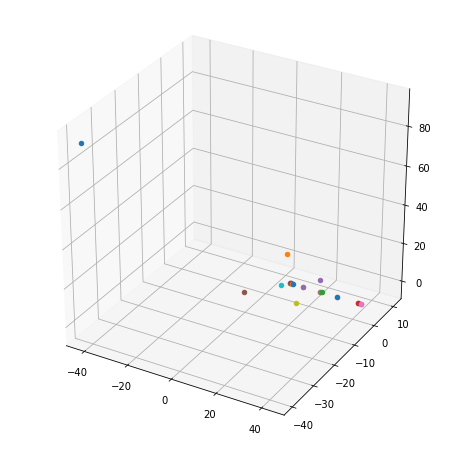

In [35]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(skeleton_mocap.offsets().shape[0]):
    joint = skeleton_mocap.offsets()[i].numpy()
    ax.scatter(joint[0], joint[2], joint[1])

In [86]:
rotations0 = torch.zeros(1, 1, 22, 4)
root_positions = torch.zeros(1, 1, 3)

print(rotations0.shape, rotations0.dtype)

torch.Size([1, 1, 22, 4]) torch.float32


In [87]:
rotations = torch.tensor(sequence['local_q'], dtype=torch.float32).unsqueeze(0)

print(rotations.shape, rotations.dtype)

torch.Size([1, 1, 22, 4]) torch.float32


In [88]:
X = skeleton_mocap.forward_kinematics(rotations, root_positions)

In [89]:
X.shape

torch.Size([1, 1, 22, 3])

In [90]:
joints = X[0, 0]

In [91]:
joints.shape

torch.Size([22, 3])

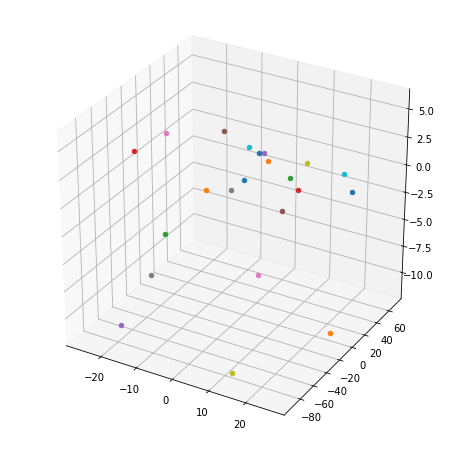

In [93]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

for joint in joints.numpy():
    ax.scatter(joint[0], joint[1], joint[2])